In [67]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

---

<h1><center>SDSE Homework 3 <br><br> Simple linear regression </center></h1>

---

In [68]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle

# 0. Load the data

In this homework we will implement simple linear regression and apply it to four different datasets. 

All of the formulas can be found in the lecture and reader. 

The four datasets are contained in `hw3data.pickle`. Each dataset is a tuple with entries `x` and `y`:  `DA = (x,y)`.

In [69]:
with open('hw3data.pickle','rb') as f:
    DA, DB, DC, DD = pickle.load(f)

# 1. Scatter plots

Display each of the four datasets using matplotlib [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plots. Your plot should look similar to the one below, with two rows and two columns of plots.  

<img src="f1.png" />

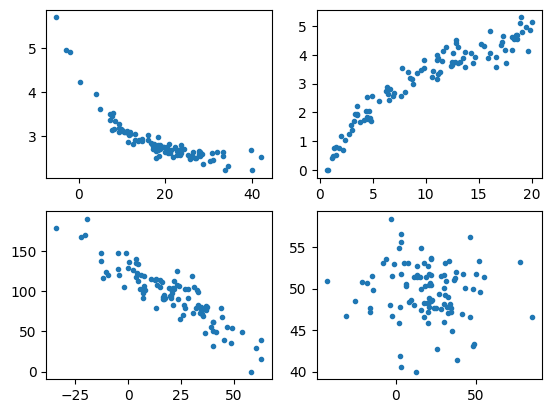

In [70]:
fig, ax = plt.subplots(nrows=2,ncols=2)  # TODO
ax[0,0].scatter(DA[0],DA[1],marker='.')
ax[1,0].scatter(DC[0],DC[1],marker='.')
ax[0,1].scatter(DB[0],DB[1],marker='.')
ax[1,1].scatter(DD[0],DD[1],marker='.')

# 2. Sample correlation coefficient

Implement the function `corr(D)` that takes a dataset tuple `D` and returns its sample correlation coefficient $r$. 

In [71]:
def corr(D):
    x, y = D
    mux = np.sum(x)/x.shape[0]
    stdx = np.sqrt(np.sum((x-mux)**2)/(x.shape[0]-1))
    muy = np.sum(y)/y.shape[0]
    stdy = np.sqrt(np.sum((y-muy)**2)/(y.shape[0]-1))
    covxy = np.sum((x-mux)*(y-muy))/(x.shape[0]-1)     # TODO
    r = covxy/(stdx*stdy)
    return r      # TODO

In [72]:
rA = corr(DA)
rB = corr(DB)
rC = corr(DC)
rD = corr(DD)

print(f'rA={rA}')
print(f'rB={rB}')
print(f'rC={rC}')
print(f'rD={rD}')


rA=-0.8099147715792738
rB=0.9385834707944012
rC=-0.901091501635049
rD=-0.08311748917950813


In [73]:
grader.check("q2")

q2 results: All test cases passed!

# 3. Compute linear regresssion coefficients

Implement the function `compute_linear_regression(D)` that takes a dataset tuple `D` and returns the coefficients of the linear regression $\theta_0$ and $\theta_1$. 

In [74]:
def compute_linear_regression(D):
    x, y = D                 # TODO
    mux = np.sum(x)/x.shape[0]
    muy = np.sum(y)/y.shape[0]
    theta1 = np.sum((x-mux)*(y-muy))/np.sum((x-mux)**2)    # TODO
    theta0 = muy - mux*theta1        # TODO
    return theta0, theta1

In [75]:
thetaA = compute_linear_regression(DA)
thetaB = compute_linear_regression(DB)
thetaC = compute_linear_regression(DC)
thetaD = compute_linear_regression(DD)

print(f'A: {thetaA}')
print(f'B: {thetaB}')
print(f'C: {thetaC}')
print(f'D: {thetaD}')

A: (3.749057503898907, -0.0462178161454909)
B: (0.9678247739262225, 0.21205965956389664)
C: (127.14629626815378, -1.5443047558209406)
D: (49.898312434885575, -0.013256989456468088)


In [76]:
grader.check("q3")

q3 results: All test cases passed!

# 4. Evaluate linear regresssion prediction

Implement the function `eval_linreg(theta,D)` that takes parameters $\theta=(\theta_0,\theta_1$ and the dataset `D=(x,y)` and returns the array of predictions $\hat{y}$ for the training data: 
$$\hat{y} = \theta_0 + x \theta_1$$

In [77]:
def eval_linreg(theta,D):
    yhat = theta[0]+D[0]*theta[1]        # TODO
    return yhat      # TODO

In [78]:
yhatA = eval_linreg(thetaA,DA)
yhatB = eval_linreg(thetaB,DB)
yhatC = eval_linreg(thetaC,DC)
yhatD = eval_linreg(thetaD,DD)

print(f'yhatA[:20:3]={yhatA[:20:3]}')
print(f'yhatB[:20:3]={yhatB[:20:3]}')
print(f'yhatC[:20:3]={yhatC[:20:3]}')
print(f'yhatD[:20:3]={yhatD[:20:3]}')

yhatA[:20:3]=[3.98923839 3.73908805 3.4193214  3.39071521 3.36528081 3.31764243
 3.26114505]
yhatB[:20:3]=[1.10744508 1.2380595  1.29750078 1.42506595 1.59110387 1.67990742
 1.71890906]
yhatC[:20:3]=[179.72584278 156.97516769 145.60977061 134.87236202 129.92229685
 126.71703594 121.67884977]
yhatD[:20:3]=[50.46531219 50.17274557 50.10828722 50.00413843 49.93722651 49.91523581
 49.86076567]


In [79]:
grader.check("q4")

q4 results: All test cases passed!

# 5. Plot linear regresssion prediction

Overlay the linear regression lines on each one of the scatter plots. Your plot should look like this:

<img src="f2.png" />

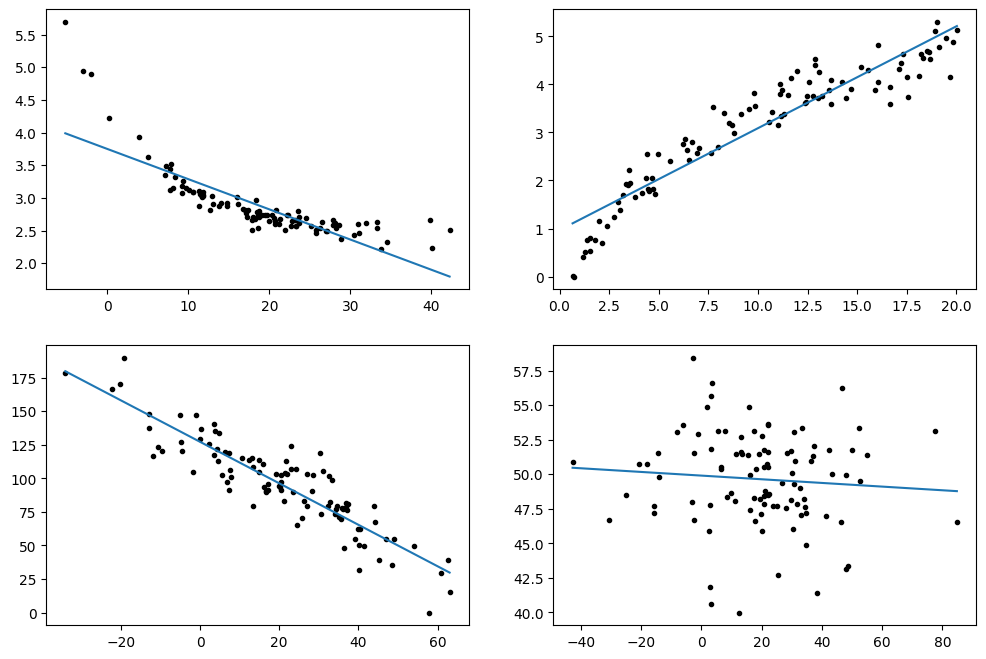

In [80]:
fig, ax = plt.subplots(figsize=(12,8),nrows=2,ncols=2)
ax[0,0].scatter(DA[0],DA[1],color='k',marker='.')
ax[0,0].plot(DA[0],yhatA)
ax[0,1].scatter(DB[0],DB[1],color='k',marker='.')
ax[0,1].plot(DB[0],yhatB)
ax[1,0].scatter(DC[0],DC[1],color='k',marker='.')
ax[1,0].plot(DC[0],yhatC)
ax[1,1].scatter(DD[0],DD[1],color='k',marker='.')
ax[1,1].plot(DD[0],yhatD)

# 6. Coefficient of determinination

Implement the function `eval_Rsquared(theta,D)` that takes parameters $\theta=(\theta_0,\theta_1)$ and the dataset `D` and returns the coefficient of determination $R^2$. Verify the identity $R^2=r^2$


In [81]:
def eval_Rsquared(theta,D):
    x, y = D                 
    muy = np.sum(y)/y.shape[0]
    yhat = eval_linreg(theta,D)
    Rsquared = 1 - (np.sum((D[1]-yhat)**2)/np.sum((D[1]-muy)**2))            # TODO
    return Rsquared      # TODO

In [82]:
RsquaredA = eval_Rsquared(thetaA,DA)
RsquaredB = eval_Rsquared(thetaB,DB)
RsquaredC = eval_Rsquared(thetaC,DC)
RsquaredD = eval_Rsquared(thetaD,DD)

print(f'RsquaredA={RsquaredA}')
print(f'RsquaredB={RsquaredB}')
print(f'RsquaredC={RsquaredC}')
print(f'RsquaredD={RsquaredD}')

RsquaredA=0.6559619372223071
RsquaredB=0.8809389316484644
RsquaredC=0.8119658943189078
RsquaredD=0.006908517007505277


# 7. Estimate $\sigma^2$

Implement the function `estimate_sigma2(theta,D)` that takes parameters $\theta=(\theta_0,\theta_1)$ and the dataset `D` and returns an unbiased estimate of the variance $\sigma^2$ of the uncertainty values $\varepsilon_i$ in $y_i=\theta_0^* + x_i\theta_1^*  + \varepsilon_i$. 

$$\hat\sigma^2  = \frac{1}{N-2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$


In [83]:
def estimate_sigma2(theta,D):
    x, y = D
    N = len(y)           
    yhat = eval_linreg(theta,D)  # TODO
    sigma2 = np.sum((y-yhat)**2)/(N-2) #residules: y-yhat
    return sigma2      # TODO

In [84]:
sigma2A = estimate_sigma2(thetaA,DA)
sigma2B = estimate_sigma2(thetaB,DB)
sigma2C = estimate_sigma2(thetaC,DC)
sigma2D = estimate_sigma2(thetaD,DD)

print(f'sigma2A={sigma2A}')
print(f'sigma2B={sigma2B}')
print(f'sigma2C={sigma2C}')
print(f'sigma2D={sigma2D}')

sigma2A=0.0962882921462249
sigma2B=0.2082814866175884
sigma2C=218.80072616698286
sigma2D=11.604657865691147


In [85]:
grader.check("q7")

q7 results: All test cases passed!

# 8. Uncertainty in the linear regression coefficients

Implement the function `estimate_sigma2(theta,D)` that takes parameters $\theta=(\theta_0,\theta_1)$ and the dataset `D` and returns the variance associated with the linear regression parameter estimates $Var[\hat\Theta_0]$ and $Var[\hat\Theta_1]$.

In [86]:
def compute_var_param(theta,D):
    x,y = D
    mux = np.sum(x)/x.shape[0]
    N = x.shape[0]
    sigmax2 = np.sum((x-mux)**2)/(N-1)       # TODO
    sigma2 = estimate_sigma2(theta,D)
    var0 = sigma2/N + sigma2*(mux**2)/((N-1)*sigmax2)     # TODO
    var1 = sigma2/((N-1)*sigmax2)      # TODO
    return var0, var1

In [87]:
varA = compute_var_param(thetaA,DA)
varB = compute_var_param(thetaB,DB)
varC = compute_var_param(thetaC,DC)
varD = compute_var_param(thetaD,DD)

print(f'A: {varA}')
print(f'B: {varB}')
print(f'C: {varC}')
print(f'D: {varD}')

A: (0.004944706915203484, 1.1431957976526581e-05)
B: (0.008480394564633838, 6.201746581241883e-05)
C: (4.569117407139045, 0.005635582130422289)
D: (0.21272847310590542, 0.00025779124994615524)


In [88]:
grader.check("q8")

q8 results: All test cases passed!

# 9. Confidence intervals and hypothesis tests

Implement the function `compute_rho(theta,D,gamma)` that takes parameters $\theta=(\theta_0,\theta_1)$, the dataset `D`, and a confidence level $\gamma$, and returns the radiuses $\rho_0$ and $\rho_1$ of the $\gamma$-confidence intervals for $\theta^*_0$ and $\theta^*_1$ respectively. 

In [89]:
def compute_rho(theta,D,gamma):
    x,y = D             # TODO
    Nx = len(x)
    Ny = len(y)
    vars = compute_var_param(theta, D)
    varx,vary =vars
    rho0 = np.sqrt(varx)*abs(stats.norm().ppf((1-gamma)/2))      # TODO
    rho1 = np.sqrt(vary)*abs(stats.norm().ppf((1-gamma)/2))      # TODO
    return rho0, rho1

In [90]:
gamma = 0.98
rhoA = compute_rho(thetaA,DA,gamma)
rhoB = compute_rho(thetaB,DB,gamma)
rhoC = compute_rho(thetaC,DC,gamma)
rhoD = compute_rho(thetaD,DD,gamma)

print(f'rhoA={rhoA}')
print(f'rhoB={rhoB}')
print(f'rhoC={rhoC}')
print(f'rhoD={rhoD}')

rhoA=(0.16358554892650395, 0.007865656343192947)
rhoB=(0.214231183811987, 0.018320261402565534)
rhoC=(4.97268348585844, 0.1746401315487988)
rhoD=(1.072969728803447, 0.037351559940089984)


In [91]:
grader.check("q9")

q9 results: All test cases passed!

# 10. Negligible parameters
For which of the slope parameters `thetaA[1]`, `thetaB[1]`, `thetaC[1]`, or `thetaD[1]` is the null hypothesis 
$$ H_0 : \theta^*_1=0$$
**not** rejected in favor of
$$ H_1 : \theta^*_1\neq0$$
with $\alpha=0.05$ significance level? 

Provide your answer as a string from `{'A','B','C','D'}`

In [92]:
answer = 'C','D'      # TODO

# 11. Nonlinear feature vector

The dataset `DA` looks like it could be modeled as an exponential decay. Let's use this insight to see whether we can improve the regression model for this dataset. Define a feture vector `phi` with
$$\phi(x) = e^{-\lambda x}$$
Using trial-and-error, find a value for $\lambda$ that achieves an $R^2$ of 0.9 or more. 

0.9630537228092376


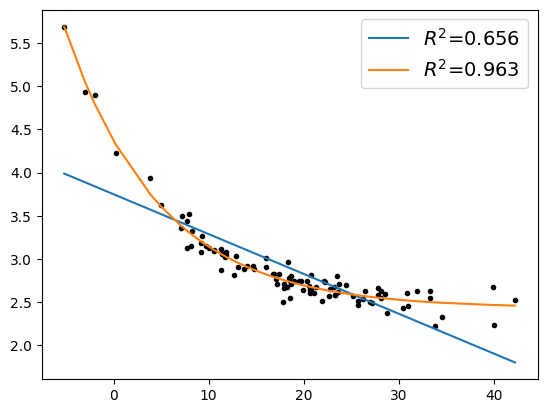

In [93]:
lbda = -0.1         # TODO
x, y = DA
phi = np.exp(lbda*x)
DA2 = (phi,y)
thetaA2 = compute_linear_regression(DA2)           # TODO
RsquaredA2 = eval_Rsquared(thetaA2,DA2)        # TODO
print(RsquaredA2)

fig, ax = plt.subplots()
ax.scatter(DA[0],DA[1],color='k',marker='.')
ax.plot(DA[0],eval_linreg(thetaA,DA),label='$R^2$={:.3f}'.format(RsquaredA))
ax.plot(DA[0],eval_linreg(thetaA2,DA2),'-',label='$R^2$={:.3f}'.format(RsquaredA2))
ax.legend(fontsize=14)

In [94]:
grader.check("q11")

q11 results: All test cases passed!

# 12. Prediction uncertainty


Implement the function `compute_var_prediction(theta,D,gamma,xi)` that takes parameters $\theta$, the dataset `D`, and a data sample $x_i$, and returns the variance in the prediction $\hat{y}_i$ corresponding to $x_i$.

In [95]:
def compute_var_prediction(theta,D,xi):
    x,y = D # TODO
    mux = np.sum(x)/x.shape[0]
    N = x.shape[0]
    sigmax2 = np.sum((x-mux)**2)/(N-1)       # TODO
    sigma2 = estimate_sigma2(theta,D)
    varY = sigma2/N + sigma2*((xi-mux)**2)/((N-1)*sigmax2)     # TODO  
    return varY      # TODO

In [96]:
varYA = compute_var_prediction(thetaA,DA,DA[0])
stddevYA = np.sqrt(varYA)

varYB = compute_var_prediction(thetaB,DB,DB[0])
stddevYB = np.sqrt(varYB)

varYC = compute_var_prediction(thetaC,DC,DC[0])
stddevYC = np.sqrt(varYC)

varYD = compute_var_prediction(thetaD,DD,DD[0])
stddevYD = np.sqrt(varYD)

print(f'stddevYA={stddevYA[:20:3]}')
print(f'stddevYB={stddevYB[:20:3]}')
print(f'stddevYC={stddevYC[:20:3]}')
print(f'stddevYD={stddevYD[:20:3]}')

stddevYA=[0.08643448 0.06966488 0.0498225  0.04820286 0.04679432 0.04424612
 0.0414014 ]
stddevYB=[0.08762327 0.08352081 0.08168098 0.07779715 0.07289334 0.07035215
 0.06925625]
stddevYC=[4.35776707 3.33866243 2.85387726 2.42265468 2.23691524 2.12253484
 1.95435833]
stddevYD=[1.05420215 0.72793851 0.65995923 0.55575209 0.49422517 0.47528383
 0.43187652]


In [97]:
grader.check("q12")

q12 results: All test cases passed!

# 13. Plot the prediction with uncertainty bounds

Repeat the scatter and prediction plot, but this time overlay an prediction uncertainty band of plus/minus two standard deviations. Your plot should look something like this:

<img src="f3.png" />


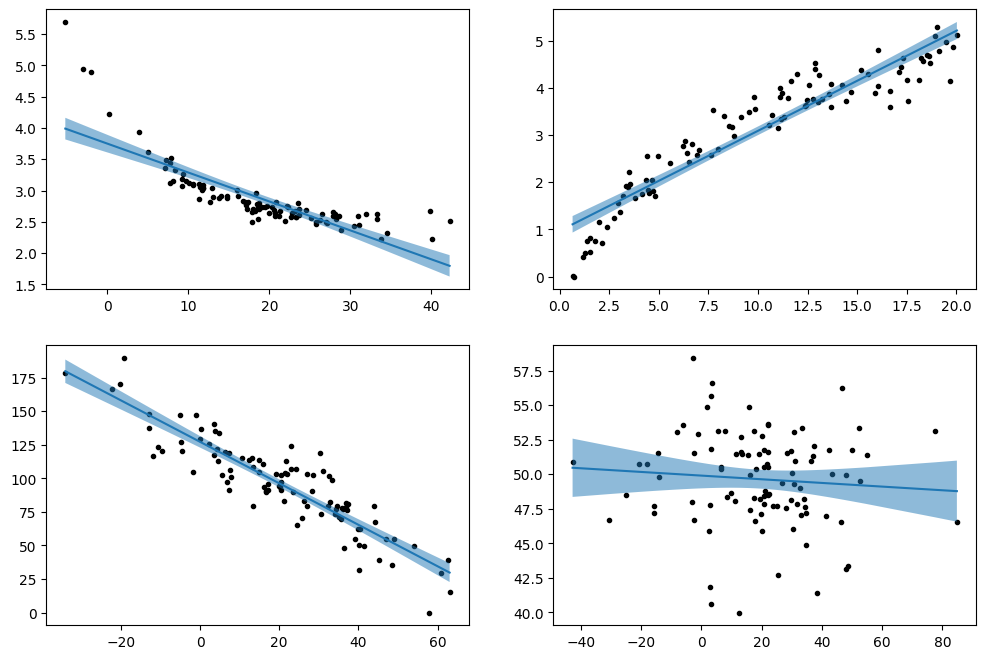

In [98]:
fig, ax = plt.subplots(figsize=(12,8),nrows=2,ncols=2)

a = ax[0,0]
yhatA = eval_linreg(thetaA,DA)
a.scatter(DA[0],DA[1],color='k',marker='.')
a.plot(DA[0],yhatA)
a.fill_between(DA[0],yhatA-2*stddevYA,yhatA+2*stddevYA,alpha=0.5)

b = ax[0,1]
yhatB = eval_linreg(thetaB,DB)
b.scatter(DB[0],DB[1],color='k',marker='.')
b.plot(DB[0],yhatB)
b.fill_between(DB[0],yhatB-2*stddevYB,yhatB+2*stddevYB,alpha=0.5)

c = ax[1,0]
yhatC = eval_linreg(thetaC,DC)
c.scatter(DC[0],DC[1],color='k',marker='.')
c.plot(DC[0],yhatC)
c.fill_between(DC[0],yhatC-2*stddevYC,yhatC+2*stddevYC,alpha=0.5)

d = ax[1,1]
yhatA = eval_linreg(thetaD,DD)
d.scatter(DD[0],DD[1],color='k',marker='.')
d.plot(DD[0],yhatD)
d.fill_between(DD[0],yhatD-2*stddevYD,yhatD+2*stddevYD,alpha=0.5)

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [99]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)